## set up

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

BASE_PATH = "../sink/silver"

### Define a Helper to Load the Most Recent File

In [3]:
def get_latest_parquet_file(folder):
    full_path = os.path.join(BASE_PATH, folder)
    files = [f for f in os.listdir(full_path) if f.endswith('.parquet')]
    if not files:
        return None
    files = [os.path.join(full_path, f) for f in files]
    latest = max(files, key=os.path.getmtime)
    return pd.read_parquet(latest)


### Load Datasets

In [4]:
customer_df = get_latest_parquet_file("customer_profiles")
loans_df = get_latest_parquet_file("loans")
billing_df = get_latest_parquet_file("credit_cards_billing")
tickets_df = get_latest_parquet_file("support_tickets")
transactions_df = get_latest_parquet_file("transactions")


# Analysis and Visualz


#### What is the cost of our transactions

Total Transaction Value: $5,044,973.00
Total Revenue from Cost: $55,044.97


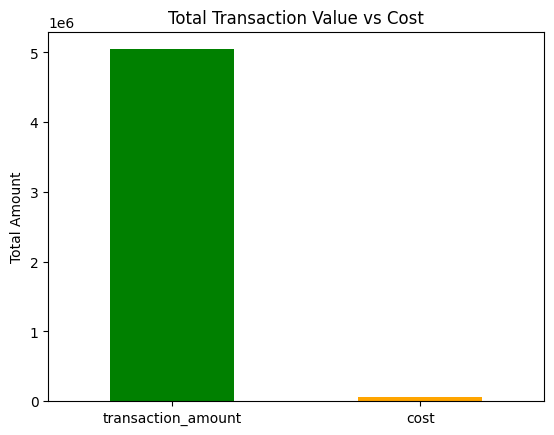

In [5]:

transactions_df = get_latest_parquet_file("transactions")

total_value = transactions_df["transaction_amount"].sum()
total_cost = transactions_df["cost"].sum()

print(f"Total Transaction Value: ${total_value:,.2f}")
print(f"Total Revenue from Cost: ${total_cost:,.2f}")
transactions_df[["transaction_amount", "cost"]].sum().plot(kind="bar", color=["green", "orange"])
plt.title("Total Transaction Value vs Cost")
plt.xticks(rotation=0)
plt.ylabel("Total Amount")
plt.show()


#### Do we maintain our customers' privacy?

In [6]:
loans_df = get_latest_parquet_file("loans")
print("Sample Encrypted Reasons:")
print(loans_df["loan_reason"].head(3))


Sample Encrypted Reasons:
0    Sl{'tl'ruv~'pm'~l'jv|sk'zwluk'h'sh'Z|ukh'q|...
1    ]sy$wlsyph$hijmrmxip}$nsmr${i$gsyph$ks$sr$e$wt...
2    `y4y44}z4y4wx4{44u4uy4...
Name: loan_reason, dtype: object


#### What debt range contains the majority of our customers ?

KeyboardInterrupt: 

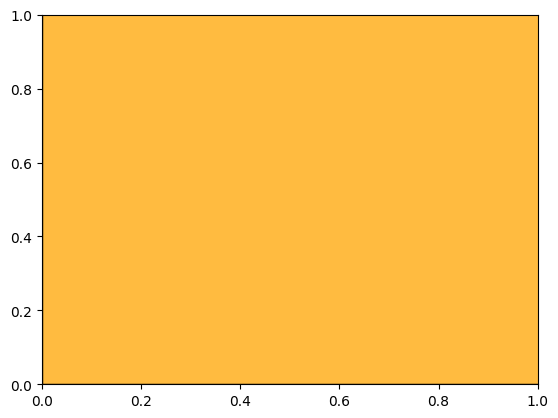

In [7]:
# Debt Distribution
sns.histplot(billing_df["debt"], bins=30, color="orange")
plt.title("Debt Distribution")
plt.xlabel("Debt Amount ($)")
plt.ylabel("Customer Count")
plt.show()


#### How many clients our bank gains each year ?


In [ ]:
customer_df["account_open_date"] = pd.to_datetime(customer_df["account_open_date"])
customer_df["join_month"] = customer_df["account_open_date"].dt.to_period("M")
customer_df["join_year"] = customer_df["account_open_date"].dt.year

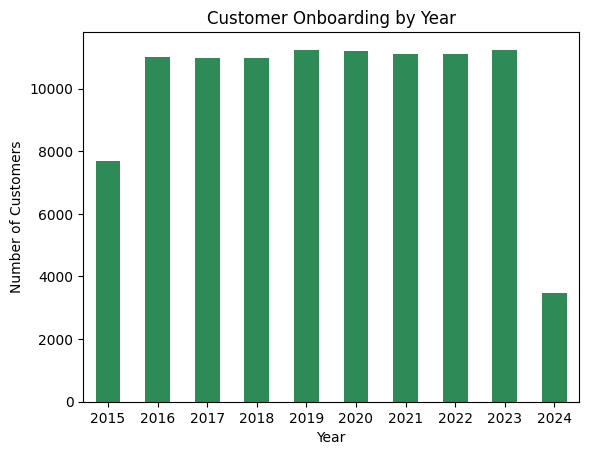

In [ ]:
yearly_counts = customer_df["join_year"].value_counts().sort_index()
yearly_counts.plot(kind="bar", color="seagreen")
plt.title("Customer Onboarding by Year")
plt.xlabel("Year")
plt.ylabel("Number of Customers")
plt.xticks(rotation=0)
plt.show()


#### Are customers paying on time or accumulating debt ?

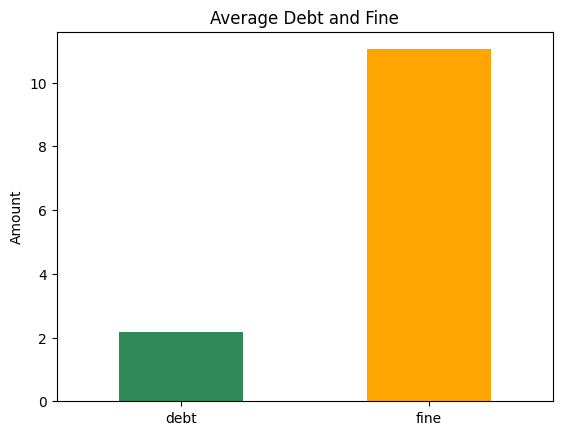

In [ ]:
billing_df[["debt", "fine"]].mean().plot(kind="bar", color=["seagreen", "orange"])
plt.title("Average Debt and Fine")
plt.ylabel("Amount")
plt.xticks(rotation=0)
plt.show()


#### How much did we make over the last two years ?

year
2024    37953.669
2025    17091.304
Name: cost, dtype: float64


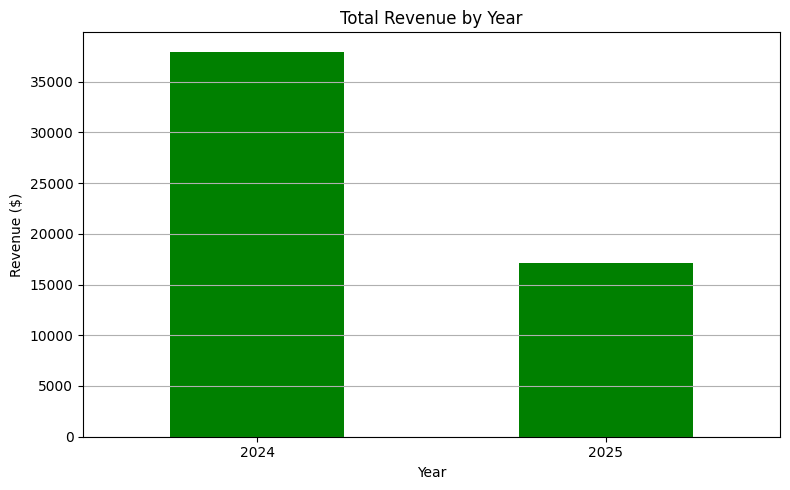

In [ ]:
transactions_df["transaction_date"] = pd.to_datetime(transactions_df["transaction_date"])
transactions_df["year"] = transactions_df["transaction_date"].dt.year
revenue_per_year = transactions_df.groupby("year")["cost"].sum()
print(revenue_per_year)
revenue_per_year.plot(kind="bar", color="green", figsize=(8, 5))
plt.title("Total Revenue by Year")
plt.xlabel("Year")
plt.ylabel("Revenue ($)")
plt.xticks(rotation=0)
plt.grid(axis="y")
plt.tight_layout()
plt.show()


#### Which cities hold the largest share of our customer base ?

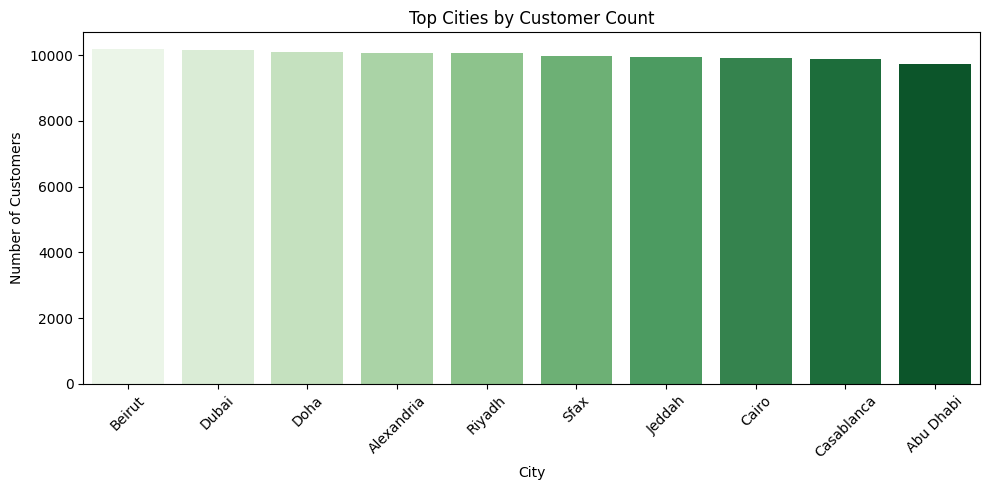

In [ ]:
city_counts = customer_df["city"].value_counts()

plt.figure(figsize=(10, 5))
sns.barplot(
    x=city_counts.index,
    y=city_counts.values,
    hue=city_counts.index,
    palette="Greens", 
    legend=False
)
plt.title("Top Cities by Customer Count")
plt.xlabel("City")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### Which financial products are most frequently used by our customers ?

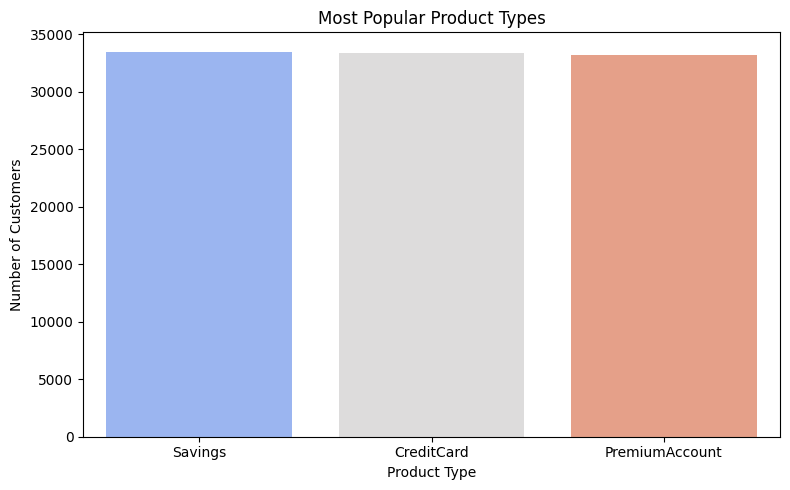

In [ ]:
product_counts = customer_df["product_type"].value_counts()

plt.figure(figsize=(8, 5))
sns.barplot(
    x=product_counts.index,
    y=product_counts.values,
    hue=product_counts.index,   
    palette="coolwarm",
    legend=False
)
plt.title("Most Popular Product Types")
plt.xlabel("Product Type")
plt.ylabel("Number of Customers")
plt.tight_layout()
plt.show()
